In [24]:

import networkx as nx
import EoN
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


# Fijando los parametros del modelo.

In [25]:
tau = 0.3#transmission rate
gamma = 1.0 #recovery rate

rho = 0.005#initial fraction infected


In [4]:
#Parametros por defecto


#tmin = 0     #starting time         
#tmax=float('Inf')  #maximum time after which simulation will stop.

#transmission_weight**    string  (default None)
       
#recovery_weight**   string (default None))
    


# Funciones Propias Auxiliares Utiles

In [26]:
#Codigo para partir las simulaciones


def get_listados_nodos_a_tiempo(simulacion, tiempo):
    
    estados = simulacion.get_statuses(time=tiempo)
    #dictionario nodo: status

    susceptibles = []
    infectados = []
    recuperados = []

    #print(type(estados[0]))

    for nodo in estados.keys():
        status = estados[nodo]
        if(status == 'S'):
            susceptibles.append(nodo)
        elif(status == 'I'):
            infectados.append(nodo)
        else:
            recuperados.append(nodo)
            
            
    return susceptibles,infectados, recuperados


In [30]:
# Función que elimina enlaces
def elimina_enlaces(grafo,prob):
    """
        Probabilidad con la que eliminar un enlace con porbabilidad uniforme
    """
    
    
    for edge in list(grafo.edges):
        
        r= np.random.uniform(0, 1)
        if(r<= prob):
            u,v = edge
            grafo.remove_edge(u,v)



    return grafo


In [171]:

def encuentra_tiempo_limite_alcanzado(tabla_tiempos,tabla_infectados, limite):
    """
        Encuentra el primer tiempo t a partir del cual el numero de infectados >= limite
    """
    
    assert len(tabla_tiempos) == len(tabla_infectados), "Las tablas deben de tener le mismo tamaño"
    
    index = -1
    
    for i in range(len(tabla_infectados)):
        if(tabla_infectados[i]>= limite):
            index = i
            break
            
    if(index==-1):
        print("ATENCION: El limite no se supera!")
        return -1
    else:
        print("El limite se supera en:", tabla_tiempos[index])
        return tabla_tiempos[index]
        
        

# Generando topologias de grafos.

## ERDOS–RENYI

In [100]:
#CREAR GRAFO ERDOS–RENYI -  (1M individuos, 5 conexiones de promedio)

N = 10**5#number of individuals
kave = 10#expected number of partners
#print('generating graph G with {} nodes'.format(N))
g_erdosrenyi_1M = nx.fast_gnp_random_graph(N, kave/(N-1))#Erdo's-Re'nyi graph



In [62]:
#SIMULACION
t_erdosrenyi_1M, S_erdosrenyi_1M, I_erdosrenyi_1M, R__erdosrenyi_1M = EoN.fast_SIR(g_erdosrenyi_1M, tau, gamma, rho=rho)
print('Simulacion finalizada')




Simulacion finalizada


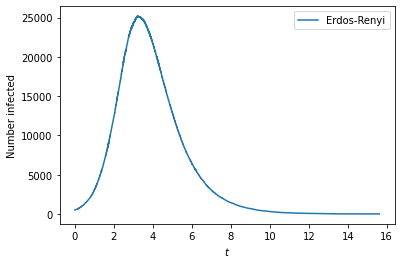

In [161]:
#Represetacion
plt.plot(t_erdosrenyi_1M, I_erdosrenyi_1M, label = 'Erdos-Renyi')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

In [183]:
 encuentra_tiempo_limite_alcanzado(t_erdosrenyi_1M,I_erdosrenyi_1M, 25000)


El limite se supera en: 3.152356848933201


3.152356848933201

# Barabasi

In [6]:
#CREAR GRAFO BARABASI ()

#N = 10**5#number of individuals

n_edges_b = 5 #number of edges to attach from a new node to existing nodes
#n_edges_b_2 = 6 #number of edges to attach from a new node to existing nodes

G_b = nx.barabasi_albert_graph(N,n_edges_b) 
#G_b_2 = nx.barabasi_albert_graph(N,n_edges_b_2) 

In [7]:
#SIMULACION


t_b, S_b, I_b, R_b = EoN.fast_SIR(G_b, tau, gamma, rho=rho)
#t_b_2, S_b_2, I_b_2, R_b_2 = EoN.fast_SIR(G_b_2, tau, gamma, rho=rho)
#print('done with simulations, now plotting')


In [13]:
#CREAR GRAFO NEWMAN WATTS STROGATZ
n_nb_normal = 10 #num vecinos
n_nb_random = 9 #num vecinos

G_n = nx.watts_strogatz_graph(N, n_nb_normal, 0)
G_n_randomedges =nx.newman_watts_strogatz_graph(N, n_nb_random, 0.25)
#G_N_2 =nx.newman_watts_strogatz_graph(N, n_nb, 0.2)

In [14]:
#SIMULACION

t_n, S_n, I_n, R_n = EoN.fast_SIR(G_n, tau, gamma, rho=rho)
t_n_randomedges, S_n_randomedges, I_n_randomedges, R_n_randomedges = EoN.fast_SIR(G_n_randomedges, tau, gamma, rho=rho)
#t_n_2, S_n_2, I_n_2, R_n_2 = EoN.fast_SIR(G_N_2, tau, gamma, rho=rho)

In [15]:
#Comprobamos que la media de conexiones por nodo son las mismas para cada una de las topologías
print('Avg edges per node ERDOS-RENYI: ' + str(g_erdosrenyi_1M.number_of_edges()/N))
print('Avg edges per node BARABASI-ALBERT: ' + str(G_b.number_of_edges()/N))
print('Avg edges per node CIRCULAR: ' + str(G_n.number_of_edges()/N))
print('Avg edges per node NEWMAN-WATTS-STROGATZ: ' + str(G_n_randomedges.number_of_edges()/N))

Avg edges per node ERDOS-RENYI: 5.00212
Avg edges per node BARABASI-ALBERT: 4.99975
Avg edges per node CIRCULAR: 5.0
Avg edges per node NEWMAN-WATTS-STROGATZ: 4.99989


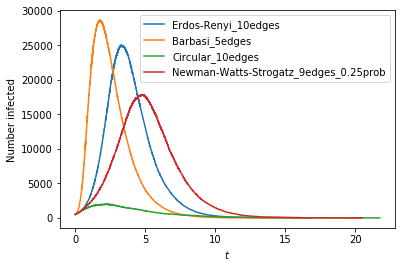

In [16]:
#Representacion
plt.plot(t_erdosrenyi_1M, I_erdosrenyi_1M, label = 'Erdos-Renyi_10edges')
plt.plot(t_b, I_b, label = 'Barbasi_5edges')
#plt.plot(t_b_2, I_b_2, label = 'Barbasi_5edges')
plt.plot(t_n, I_n, label = 'Circular_10edges')
plt.plot(t_n_randomedges, I_n_randomedges, label = 'Newman-Watts-Strogatz_9edges_0.25prob')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

## Simulacion con full_data y pruebas

In [164]:
#SIMULACION
sim_erdosrenyi_1M= EoN.fast_SIR(g_erdosrenyi_1M, tau, gamma, rho=rho, return_full_data = True)
print("Simulacion finalizad")

Simulacion finalizad


dict_keys(['S', 'I', 'R'])


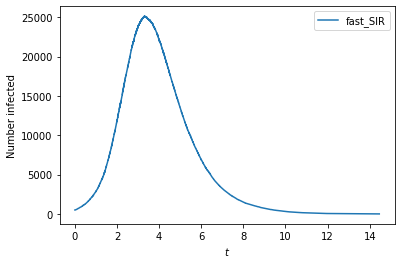

In [177]:
tiempos, estadoss=sim_erdosrenyi_1M.summary()
print(estadoss.keys())
#Represetacion
plt.plot(tiempos, estadoss['I'], label = 'fast_SIR')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()


In [179]:
#Prueba de mi funcion
tiempo=4
simulacion = sim_erdosrenyi_1M
susceptibles,infectados, recuperados = get_listados_nodos_a_tiempo(simulacion, tiempo)


print("En tiempo: ", tiempo)
print(len(susceptibles))
print(len(infectados))
print(len(recuperados))
print("Total",len(susceptibles) + len(infectados) + len(recuperados) )

En tiempo:  4
27903
22096
50001
Total 100000


# SIMULACION PARTIDA

## Ejemplo 1 (sin modificar el grafo)

In [149]:

#GENERACION DEL GRAFO
#Erdos-renyi
N = 10**5#number of individuals
kave = 10#expected number of partners
g_erdosrenyi_1M = nx.fast_gnp_random_graph(N, kave/(N-1))#Erdo's-Re'nyi graph





#-----------------SIMULACION PARTE 1

sim_erdosrenyi_1M_parte1= EoN.fast_SIR(g_erdosrenyi_1M, tau, gamma, rho=rho, return_full_data = True)
print("Simulacion  parte 1 finalizada")

#Esto lo haria para quedarme con la evolucion de la grafica hasta el tiempo t
tiempos_parte1, estados_parte1= sim_erdosrenyi_1M_parte1.summary()
infectados_parte1 = estados_parte1['I']

#A partir de tiempo t, cojo los nodos que se encuentran en cada estado



tiempo=2
simulacion = sim_erdosrenyi_1M_parte1
susceptibles,infectados, recuperados = get_listados_nodos_a_tiempo(simulacion, tiempo)

#--------------SIMULACION PARTE 2


#Modifico en grafo
g_erdosrenyi_1M = g_erdosrenyi_1M #(aqui modificaria el grafo)
print("Numero de enlaces del grafo(tras la modificacion):", len(list(g_erdosrenyi_1M.edges) ))


#simulo de nuevo(ofo con paserle bien las proporciones que no lo comprueba)
sim_erdosrenyi_1M_part2= EoN.fast_SIR(g_erdosrenyi_1M, tau, gamma,  return_full_data = True, initial_infecteds=infectados, initial_recovereds=recuperados )
print("Simulacion parte 2 finalizada")

tiempos_parte2, estados_parte2= sim_erdosrenyi_1M_part2.summary()
tiempos_parte2 = tiempos_parte2[1:] #ya que en tiempo 0 hay 0 infectados
tiempos_parte2 = [x + tiempo for x in tiempos_parte2] # desplazamos los tiempos desde timepo
infectados_parte2 = estados_parte2['I']
infectados_parte2 = infectados_parte2[1:] #ya que en tiempo 0 hay 0 infectados

#Reconpongo la parte1 de tiempos (hasta tiempo) con la parte2(entera), ojo esto tiene que ser asi
index = 0
while(tiempo > tiempos_parte1[index]):
    index +=1

        
tiempos_finales= list(tiempos_parte1[:index+1]) + list(tiempos_parte2)
infectados_finales = list(infectados_parte1[:index+1]) + list(infectados_parte2)

print("Simulacion completada")

Simulacion  parte 1 finalizada
Numero de enlaces del grafo(tras la modificacion): 499917
Simulacion parte 2 finalizada
Simulacion completada


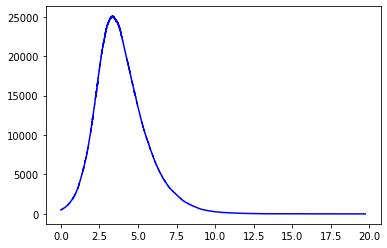

In [150]:
#Representacion

#Pintamos la Simulacion 1 normal
plt.plot(tiempos_parte1, infectados_parte1, label = 'Simulacion 1 hasta el final', color= 'blue')

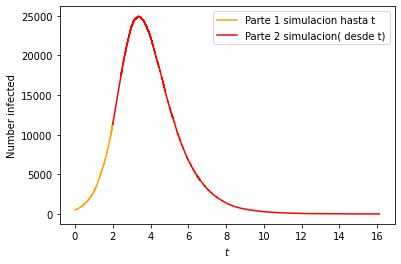

In [151]:
#Representacion

#Pintamos solo la parte 1 de la simulacion
lista1= list(tiempos_parte1[:index+1])
lista2= list(infectados_parte1[:index+1])
plt.plot(lista1,lista2 , label = 'Parte 1 simulacion hasta t', color = 'orange')

#Pintamos solo la parte 2 de la simulacion 

plt.plot(tiempos_parte2,infectados_parte2 , label = 'Parte 2 simulacion( desde t)', color = 'red')

plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

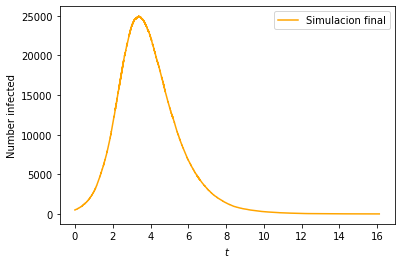

In [152]:
#Representacion
#Pintamos la Simulacion 1 normal
#plt.plot(tiempos_parte1, infectados_parte1, label = 'Simulacion 1 hasta el final', color= 'blue')

#Pintamos solo la parte 1 de la simulacion

plt.plot(tiempos_finales,infectados_finales , label = 'Simulacion final', color = 'orange')

plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

## Ejemplo 2 (modificando  el grafo)

In [157]:
# GENERAMOS EL GRAFO


#Erdos-renyi
N = 10**5#number of individuals
kave = 10#expected number of partners
g_erdosrenyi_1M_ejem2 = nx.fast_gnp_random_graph(N, kave/(N-1))#Erdo's-Re'nyi graph

print('Generated graph G with {} nodes'.format(N))
print('Generated graph G with  edges', len(list(g_erdosrenyi_1M_ejem2.edges))," enlaces")



#-----------------SIMULACION PARTE 1

sim_erdosrenyi_1M_part1_ejem2= EoN.fast_SIR(g_erdosrenyi_1M_ejem2, tau, gamma, rho=rho, return_full_data = True)
print("Simulacion  parte 1 finalizada")

#Esto lo haria para quedarme con la evolucion de la grafica hasta el tiempo t
tiempos_parte1_ejem2, estados_parte1_ejem2= sim_erdosrenyi_1M_part1_ejem2.summary()
infectados_parte1_ejem2 = estados_parte1_ejem2['I']

#A partir de tiempo t, cojo los nodos que se encuentran en cada estado



tiempo=2
simulacion = sim_erdosrenyi_1M_part1_ejem2
susceptibles_ejem2,infectados_ejem2, recuperados_ejem2 = get_listados_nodos_a_tiempo(simulacion, tiempo)




#--------------SIMULACION PARTE 2

#Modifico en grafo

np.random.seed (123) #Semilla para la simluacion


prob = 0.5 #probabilidad de borrar un enlace
g_erdosrenyi_1M_ejem2 = elimina_enlaces(g_erdosrenyi_1M_ejem2,prob)
print("Numero de enlaces del grafo(tras la modificacion):", len(list(g_erdosrenyi_1M_ejem2.edges) ))


#simulo de nuevo(ofo con paserle bien las proporciones que no lo comprueba)
sim_erdosrenyi_1M_part2_ejem2= EoN.fast_SIR(g_erdosrenyi_1M_ejem2, tau, gamma,  return_full_data = True, initial_infecteds=infectados_ejem2, initial_recovereds=recuperados_ejem2 )
print("Simulacion parte 2 finalizada")

tiempos_parte2_ejem2, estados_parte2_ejem2= sim_erdosrenyi_1M_part2_ejem2.summary()
tiempos_parte2_ejem2 = tiempos_parte2_ejem2[1:] #ya que en tiempo 0 hay 0 infectados
tiempos_parte2_ejem2 = [x + tiempo for x in tiempos_parte2_ejem2] # desplazamos los tiempos desde timepo
infectados_parte2_ejem2 = estados_parte2_ejem2['I']
infectados_parte2_ejem2 = infectados_parte2_ejem2[1:] #ya que en tiempo 0 hay 0 infectados



#Reconpongo la parte1 de tiempos (hasta tiempo) con la parte2(entera), ojo esto tiene que ser asi
index = 0
while(tiempo > tiempos_parte1_ejem2[index]):
    index +=1

        
tiempos_finales_ejem2= list(tiempos_parte1_ejem2[:index+1]) + list(tiempos_parte2_ejem2)
infectados_finales_ejem2 = list(infectados_parte1_ejem2[:index+1]) + list(infectados_parte2_ejem2)

print("Simulacion completada")


Generated graph G with 100000 nodes
Generated graph G with  edges 499403  enlaces
Simulacion  parte 1 finalizada
Numero de enlaces del grafo(tras la modificacion): 249924
Simulacion parte 2 finalizada
Simulacion completada


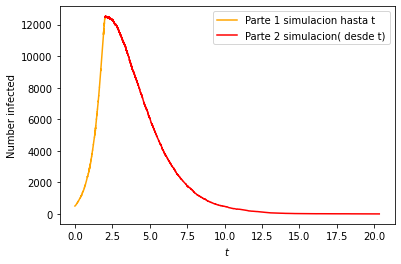

In [158]:
#Representacion

#Pintamos solo la parte 1 de la simulacion
lista1= list(tiempos_parte1_ejem2[:index+1])
lista2= list(infectados_parte1_ejem2[:index+1])
plt.plot(lista1,lista2 , label = 'Parte 1 simulacion hasta t', color = 'orange')

#Pintamos solo la parte 2 de la simulacion 

plt.plot(tiempos_parte2_ejem2,infectados_parte2_ejem2 , label = 'Parte 2 simulacion( desde t)', color = 'red')

plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

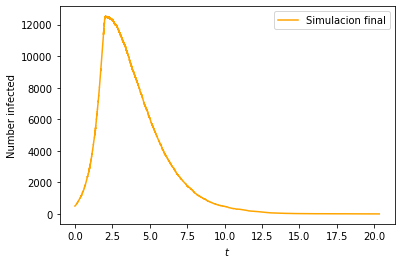

In [159]:
#Representacion
#Pintamos la Simulacion 1 normal
#plt.plot(tiempos_parte1, infectados_parte1, label = 'Simulacion 1 hasta el final', color= 'blue')

#Pintamos solo la parte 1 de la simulacion

plt.plot(tiempos_finales_ejem2,infectados_finales_ejem2 , label = 'Simulacion final', color = 'orange')

plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

# Comparativa ejemplo 1 y 2 de simulacion partida

Tiempo de corte para la modificacion del grafo:  2


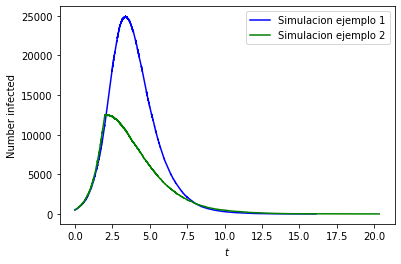

In [160]:
#Representacion


#Pintamos solo la parte 1 de la simulacion
print("Tiempo de corte para la modificacion del grafo: ", tiempo)
plt.plot(tiempos_finales,infectados_finales , label = 'Simulacion ejemplo 1', color = 'blue')
plt.plot(tiempos_finales_ejem2,infectados_finales_ejem2 , label = 'Simulacion ejemplo 2', color = 'green')

plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()